<div>
<img src="ima/logo.png" width="200"/>
</div>

> **Program:** Cognizant Artificial Intelligence Virtual Internship Program <br>
> **Project Title:** Warehouse Stock Level Prediction<br>
> **Intern:** Louis Amalye <br>
> **LinkedIN:** https://www.linkedin.com/in/louis-amakye-34358816b/<br>
> **Email:** louisamakye20@gmail.com


## Table of Contents

* [Business Problem Understanding](#bp)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Methodology](#my)   
* [Exploratory Data Analysis](#tk1)
    * [Importing Libraries](#il)
    * [Loading Data](#ld)
    * [Data Cleaning](#dc)
    * [Merge Data](#md)
    * [Univariate Analysis](#ua)
    * [Multivariate Analysis](#ma)
    * [Stastical Analysis](#sa)
* [Data Modelling](#dm)
    * [Removing Outliers](#ro)
    * [Modelling](#m)
    * [Hyperparameter Tuning](#sa)
    * [Model Visualization](#mv)
    * [Final Model](#fm)
    * [Save Model](#ma)
* [Conclusion and Recommendation](#cr) 
* [Reference](#r) 

## 1. Business Problem Understanding<a id='bp'></a>
<p style="text-align:justify;">Understanding the business problem is a critical first step when taking on a data science project, and it serves as the foundation upon which the entire project is built. It provides clarity, direction, and purpose, ensuring that the solutions generated not only address technical aspects but also contribute meaningfully to the organization's objectives. In the dynamic world of data science, success begins with a well-informed start.

</p>

### 1.1 Problem Statement <a id='ps'></a>

<p style="text-align:justify;">
Gala Groceries is a technology-led grocery store chain based in the USA. Gala Groceries approched Cognizant to help them solve supply chain issue. Groceries are highly perishable items, if you overstock, you are wasting money on excessive storage and waste, but if you understock, then you are losing  customers. Gala Groceries want to understand sale pattern and finally able to  predict the stock levels of products, on an hourly basis in order to more intelligently procure products from their suppliers.
</p>

### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible to predict the stock level of products on hourly basis using machine learning model. The hypothesis to be considered is that predict the stock level of products can be estimated on hourly basis using features unit price, sale data, IoT sensor data for temperature  of products.</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, we will seek to achieve 2 main goals and they are;</p>

* Draw unique insights from sale pattern, through Exploration Data Analysis 
* Build a predictive model to predict the hourly stock level. 

### 1.4 Information Provided <a id='in'></a>

<p style="text-align:justify;">In order to achieve the said goals and test the hypothesis of whether that the stock level of products can be predicted on hourly basis using machine learning model, Gala Groceris provided the data team at Cognizant three datasets.</p>

1. <p style="text-align:justify;"><b>Sale data</b> - Data about sale recorded, and information about the product such as unit price.</p>
2. <b>Sensor stock level data</b> - Data from IoT systems that measure the stock level at specific time interval
3. <p style="text-align:justify;"><b>sensor storage temperature data</b> – data from IoT systems the record the temperature of the storage facilities at speciific time interval.</p>

## Task 1 - Exploratory Data Analysis<a id='tk1'></a>

   ### Section 1 - Importing Libraries <a id ='il'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

%matplotlib inline


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(12,8)
plt.rcParams["figure.facecolor"] = "#00000000"

### Section 2 - Loading Data <a id ='ld'></a>

In [2]:
def read_csv(filename):
    """
    Reads a CSV file using Pandas and returns a DataFrame.

    Parameters:
        filename (str): The name of the CSV file to be read.

    Returns:
        pd.DataFrame: A DataFrame containing the data from the CSV file.
    """
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print("An error occurred:", e)
        return None


In [3]:
df_sale = read_csv('sample_sales_data.csv')
df_stock_level = read_csv("sensor_stock_levels.csv")
df_storage_temperature =read_csv("sensor_storage_temperature.csv")

In [4]:
# the shape of the dataframes
print("The shape of sale data is ",df_sale.shape)
print("The shape of sensor stock level data is ",df_stock_level.shape)
print("The shape of sensor storage temperature is ",df_storage_temperature.shape)

The shape of sale data is  (7829, 10)
The shape of sensor stock level data is  (15000, 5)
The shape of sensor storage temperature is  (23890, 4)


---
> From the above result we have about __7829__ observations and __10__ columns for `sample_sale_data`,  __15000__ observations and __5__ columns for `sensor stock level` and __23890__ observations and __4__ columns for `sensor storage temperature`
---

---

### Section 3 - Data cleaning<a id ='dc'></a>

Now that we have our 3 datasets successfully loaded, we need to ensure that the data is clean. Data cleaning can be a very intense task, so for this exercise, we will focus just on ensuring that the correct datatypes are present for each column, and if not, correcting them.

We can use the `.info()` method to look at data types.

In [5]:
# data information
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [ ]:
df_stock_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   id                   15000 non-null  object 
 2   timestamp            15000 non-null  object 
 3   product_id           15000 non-null  object 
 4   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 586.1+ KB


In [ ]:
df_storage_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23890 non-null  int64  
 1   id           23890 non-null  object 
 2   timestamp    23890 non-null  object 
 3   temperature  23890 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 746.7+ KB


In [5]:
def check_missing_values(df):
    """Reads DataFrame to return sum of missing values for each columns

    Parameters:
                 df

    Returns:
             sum of missing value for each column in df

        """
    missing = df.isna().sum()
    return missing

In [6]:
print(check_missing_values(df_sale))
print(".....................................\n")
print(check_missing_values(df_stock_level))
print(".....................................\n")
print(check_missing_values(df_storage_temperature))


Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64
.....................................

Unnamed: 0             0
id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64
.....................................

Unnamed: 0     0
id             0
timestamp      0
temperature    0
dtype: int64


In [7]:
def duplicate_row(data):
    """
    Check for duplicate rows

    Parameters:
    data(Dataframe)

    Returns
    pd.DataFrame: A merged DataFrame
    """
    duplicate_rows = data.duplicated()
    duplicate_df = data[duplicate_rows]
    return duplicate_df

In [ ]:
duplicate_row(df_sale)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type


In [ ]:
duplicate_row(df_stock_level)

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct


In [ ]:
duplicate_row(df_storage_temperature)

,Unnamed: 0,id,timestamp,temperature


---
> From the observations, there is no is __missing values__ and no __duplicate rows__. We have 6 object dtypes and four numerical dtypes for `sample_sale_data`, 3 object dtype and 2 numerical dtype for `sensor stock level` and  2 object dtype and 2 numerical dtype for `df_storage_temperature`
----
>Everything looks fine for the 3 datasets apart from the `timestamp` column in each dataset. Using the same helper function as before, let's convert this to the correct type for each dataset.
---

In [5]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [6]:
df_sale=convert_to_datetime(df_sale,"timestamp")
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7829 non-null   int64         
 1   transaction_id  7829 non-null   object        
 2   timestamp       7829 non-null   datetime64[ns]
 3   product_id      7829 non-null   object        
 4   category        7829 non-null   object        
 5   customer_type   7829 non-null   object        
 6   unit_price      7829 non-null   float64       
 7   quantity        7829 non-null   int64         
 8   total           7829 non-null   float64       
 9   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 611.8+ KB


In [7]:
df_stock_level=convert_to_datetime(df_stock_level,"timestamp")
df_stock_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           15000 non-null  int64         
 1   id                   15000 non-null  object        
 2   timestamp            15000 non-null  datetime64[ns]
 3   product_id           15000 non-null  object        
 4   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
df_storage_temperature=convert_to_datetime(df_storage_temperature,"timestamp")
df_storage_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   23890 non-null  int64         
 1   id           23890 non-null  object        
 2   timestamp    23890 non-null  datetime64[ns]
 3   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 746.7+ KB


### Section 4 - Merge Data <a id ='md'></a>

The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is timestamp.

So, we must first transform the timestamp column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [9]:
from datetime import datetime
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [10]:
df_sale=convert_timestamp_to_hourly(df_sale,"timestamp")
df_sale.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [11]:
df_stock_level=convert_timestamp_to_hourly(df_stock_level,"timestamp")
df_stock_level.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [12]:
df_storage_temperature=convert_timestamp_to_hourly(df_storage_temperature,"timestamp")
df_storage_temperature.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now you can see all of the `timestamp` columns have had the minutes and seconds reduced to `00`. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

In [13]:
sales_agg = df_sale.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum','total': 'mean'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity,total
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,33.5700
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,4.4700
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,17.9700
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,8.7150
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,1.3475


We now have an aggregated sales data where each row represents a unique combination of hour during which the sales took place from that weeks worth of data and the product_id.

In [14]:
stock_agg = df_stock_level.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


This shows us the average stock percentage of each product at unique hours within the week of sample data.

In [15]:
temp_agg = df_storage_temperature.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the stock_agg table as our base table, and we will merge our other 2 tables onto this.

In [16]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,total
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN


In [17]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,total,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN,-0.02885


In [18]:
product_categories = df_sale[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = df_sale[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [19]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,total,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN,-0.02885,pets


In [20]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,total,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN,-0.02885,pets,8.19


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   total                3067 non-null   float64       
 5   temperature          10845 non-null  float64       
 6   category             10845 non-null  object        
 7   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 762.5+ KB


We can see from the `.info()` method that we have some null values.  The columns that features some null values are `quantity`,`customer_type`, and `total`. We can assume that if there is a null value for these columns, it represents that there were 0 sales of this product within this hour.

In [22]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df['total'] = merged_df['total'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   total                10845 non-null  float64       
 5   temperature          10845 non-null  float64       
 6   category             10845 non-null  object        
 7   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 762.5+ KB


--- 
> we have alot of outliers in the `merged_df`, especially with `total` column.They will be removed before building the model.

In [23]:
merged_df.describe()

,estimated_stock_pct,quantity,total,temperature,unit_price
count,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000
mean,0.505130,0.908529,5.818700,-0.213678,8.938575
std,0.264519,1.787680,13.155445,0.649671,5.390235
min,0.010000,0.000000,0.000000,-1.847270,0.190000
25%,0.300000,0.000000,0.000000,-0.657082,4.990000
50%,0.500000,0.000000,0.000000,-0.230631,8.190000
75%,0.715000,1.000000,3.725000,0.160429,12.490000
max,1.000000,15.000000,95.960000,1.435938,23.990000


To achieve the first goal, we will try to answer the questions listed below:

* What is the distribution of the numerical dtype?
* What is the distribution of the categorical columns?
* How does the trend for stock level and total sale differ per hour?
* What is the total quantity sold per category?
* What is the total sales per category?
* What is the average sale per product category?
* What is the average spending per customer type?
* What is the average transaction per payment type?
* What is the hourly trend of sale recorded for each day?
* What are the top products by sales amount and quantity sold?
* What is the distribution of each product category sold per each day and hour?

<b>NB: Questions that can be answered are not limited to the ones stated above.</b>

--- 
> To draw insight and find interesting sale pattern, we will use helper to make things easy for use.

In [24]:
def time_format(data, time):

    data['hour'] = data[time].dt.hour
    data['dayname'] = data[time].dt.day_name()
    data['day_of_month'] = data[time].dt.day
    
    return data

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');


def aggregate_data(data,tar,car,stat = "sum"):
    df1 = data.groupby([tar])[[car]].agg(stat).reset_index().sort_values(by=car, ascending=True)
    df1[car] = df1[car].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    return df1

def myplot(df, colname, order=None):
    value_counts = df[colname].value_counts().reindex(index=order)
    plt.bar(value_counts.index, value_counts)
    plt.title(f'Distribution of {colname}'.title(), fontsize =14, weight = "bold")
    plt.xticks(rotation = 90)

    for i, v in enumerate(value_counts):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    plt.show()



def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()
    corr.style.background_gradient(cmap='coolwarm')

def get_unique_values(data, column):
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def bar_chart(data, x_col, y_col,title, x_title, y_title):
    plt.barh(data[y_col], data[x_col])
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)

    # Add value labels to the bars
    for i, value in enumerate(data[x_col]):
        plt.text(value, i, str(value), ha="left", va="center", fontweight='bold')

    plt.show()

def line_plot(data, col1, title, xtitle, ytitle):
    time_count = data.groupby(col1).size().reset_index(name='hour_count')
    plt.plot(time_count[col1],time_count["hour_count"])
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)
    plt.xticks(time_count[col1])



def plot_hour_trend(data, hou, cat):
    # Group the data by 'hour' and 'status_type' and calculate the counts
    hour_counts = data.groupby([hou, cat]).size().unstack()

    # Create a line plot for each category
    for category in hour_counts.columns:
        plt.plot(hour_counts.index, hour_counts[category], marker='o', label=category)

    # Set plot title and axis labels
    plt.title('Daily Trend by Status Types')
    plt.xticks(data["hour"])
    plt.xlabel('Hour')
    plt.ylabel('Counts')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()





### Section 5 Univariate Analysis<a id='ua'></a>

#### Question 1: What is the  distribution for estimated_stock_pct	?

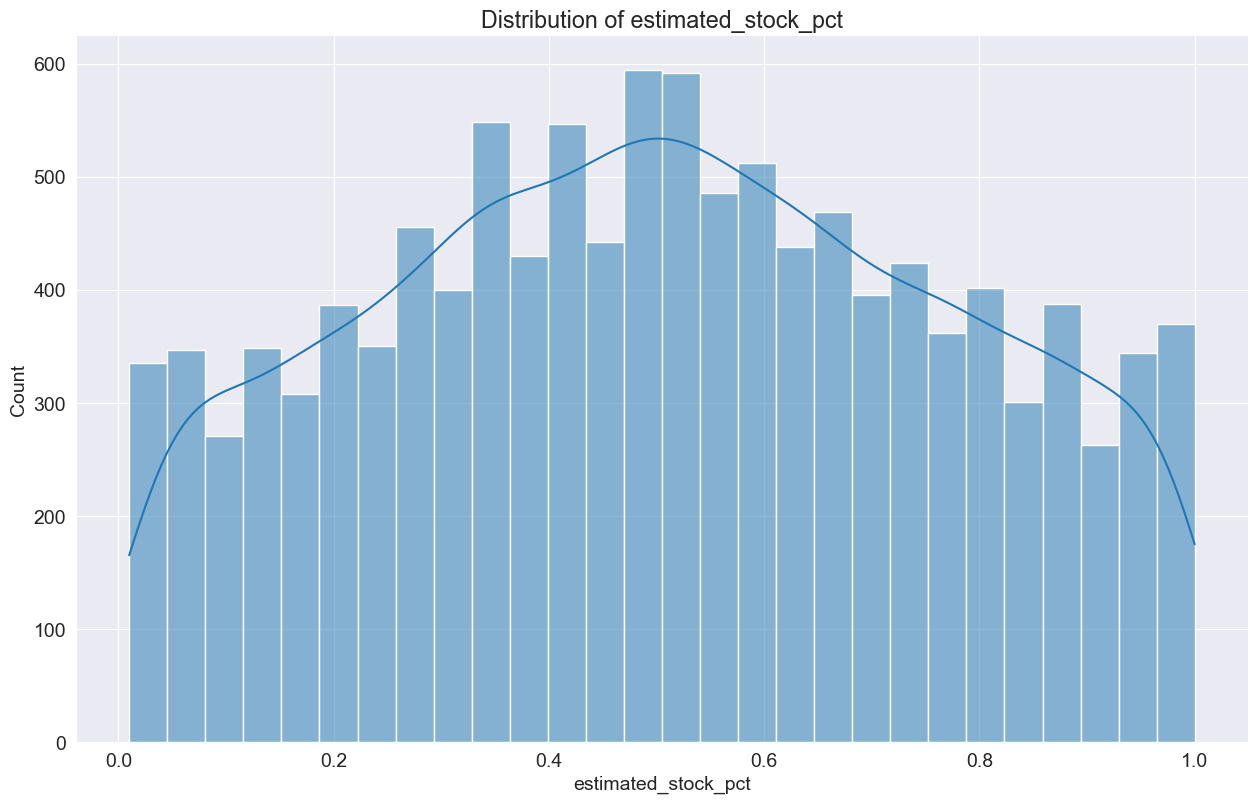

In [26]:
plot_continuous_distribution(merged_df,"estimated_stock_pct")

#### Question 2: What is the  distribution for temperature	?

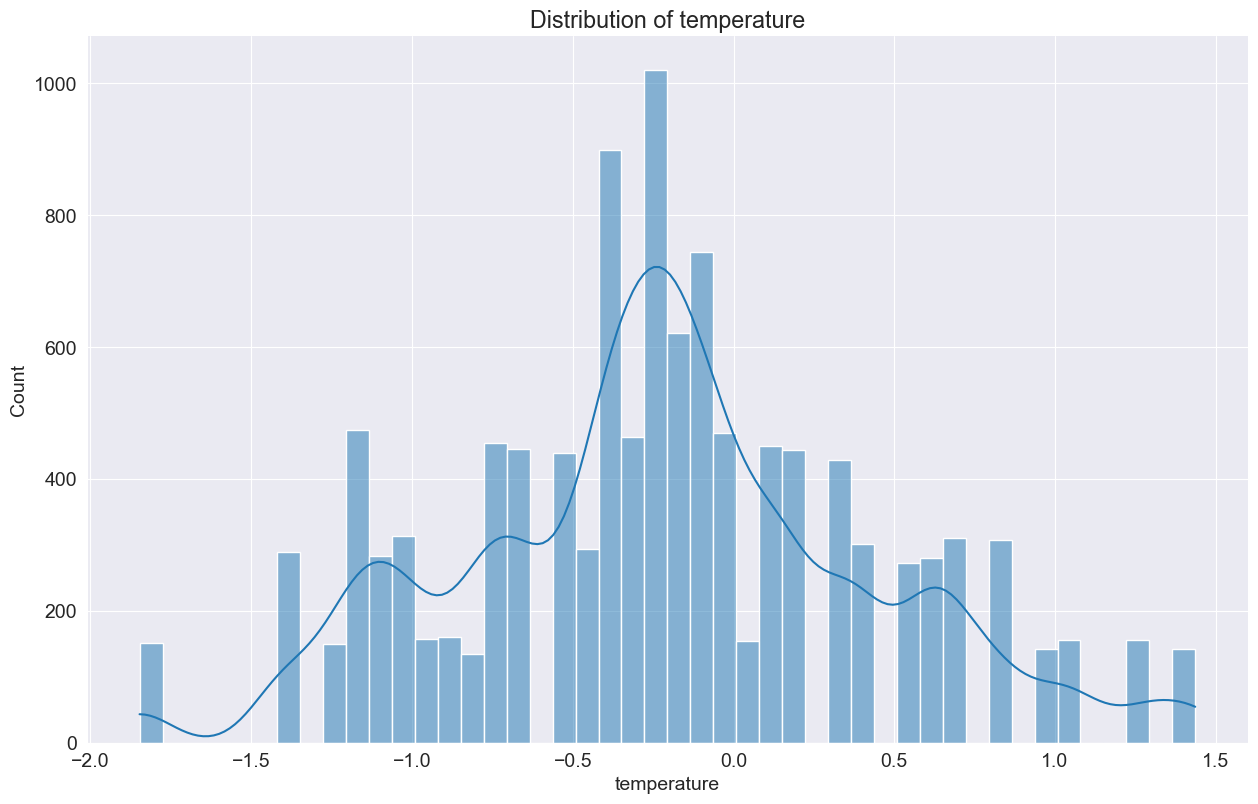

In [27]:
plot_continuous_distribution(merged_df,"temperature")

#### Question 3: What is the  distribution for total sale?

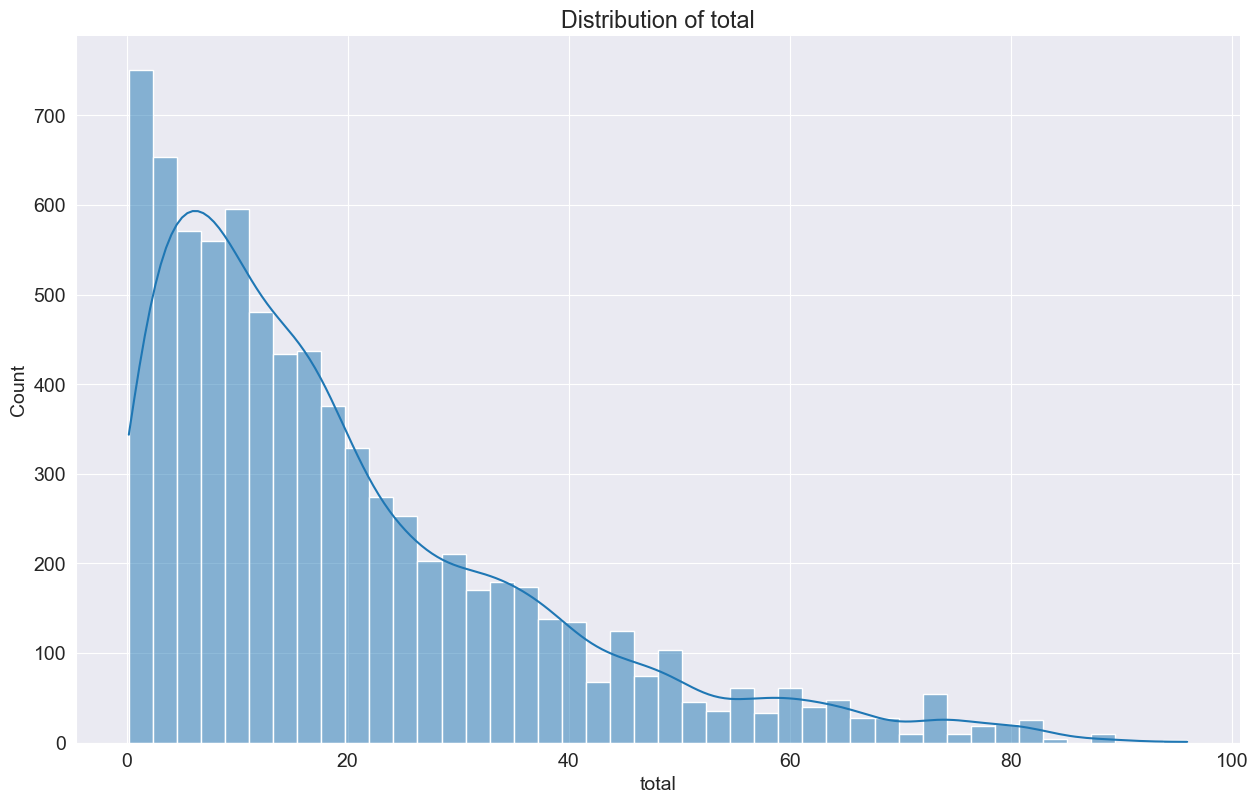

In [ ]:
plot_continuous_distribution(df_sale,"total")

#### Question 4: What is the  distribution for unit price?

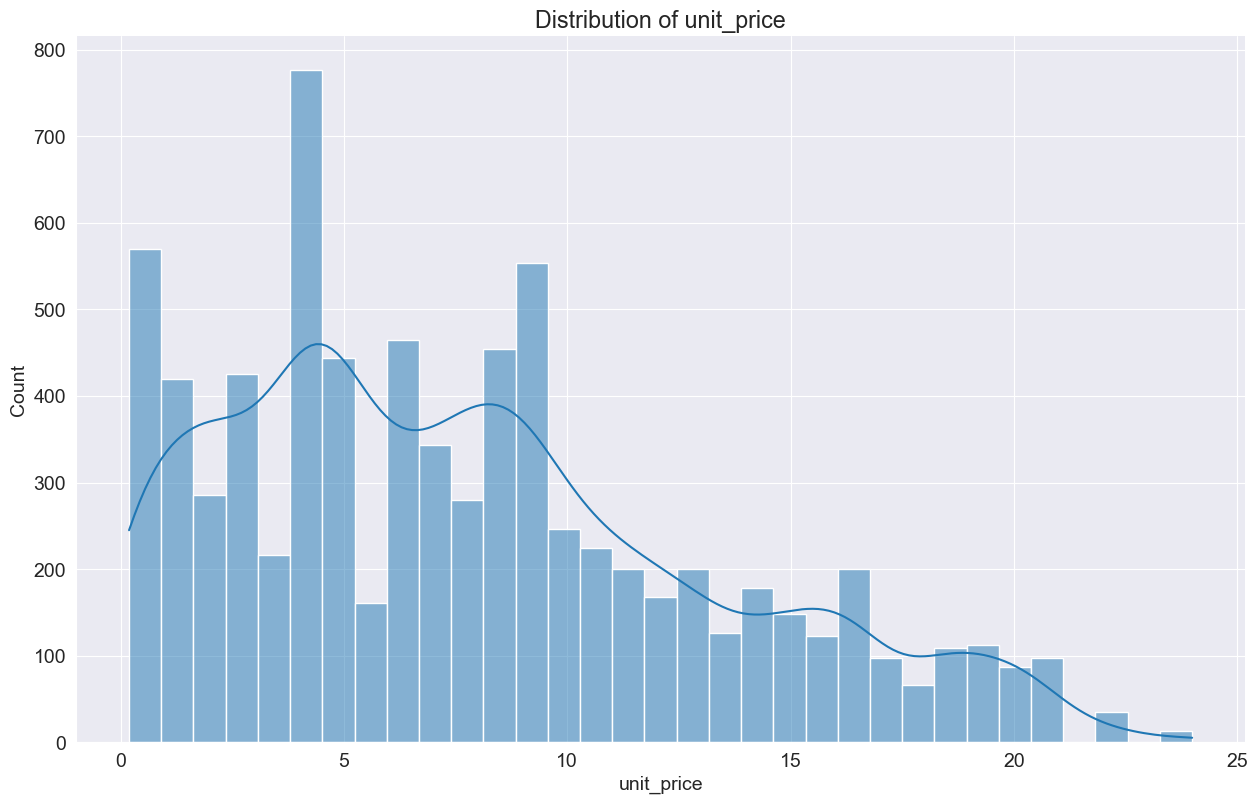

In [ ]:
plot_continuous_distribution(df_sale,"unit_price")

#### Question 5: What is the  distribution for quantity sold?

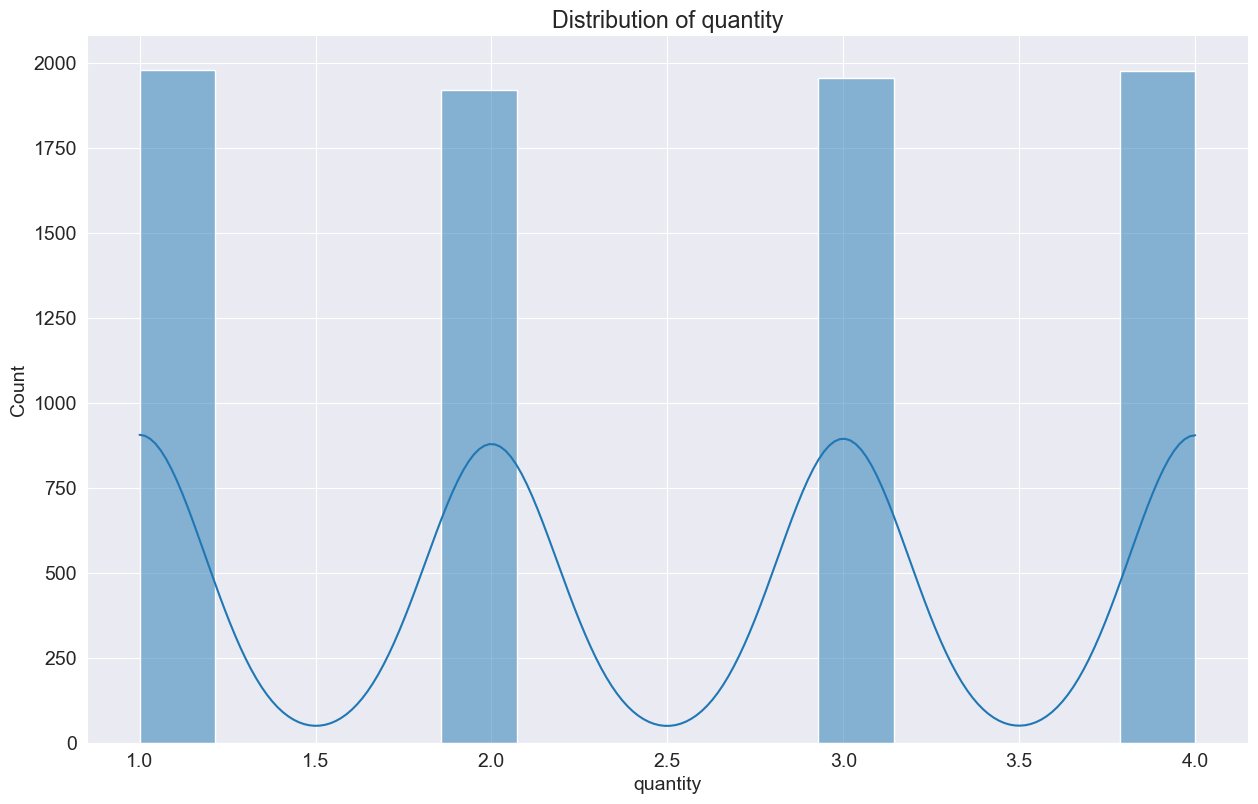

In [ ]:
plot_continuous_distribution(df_sale,"quantity")

--- 
The distribution of `temperature` and `estimated_stock_pct` is normal distribution, this means the `mean` and the `median` are equal, and the data points are evenly distributed on both side of the `mean`

The distribution of `tota` and `unit_price` are positively skewed. This means that there are relatively fewer data points with extremely high values compared to the majority of data points, which tend to cluster toward the lower end of the distribution and also the `median` is lower than the `mean`

---



#### Question 6: Which product category are sold frequently?

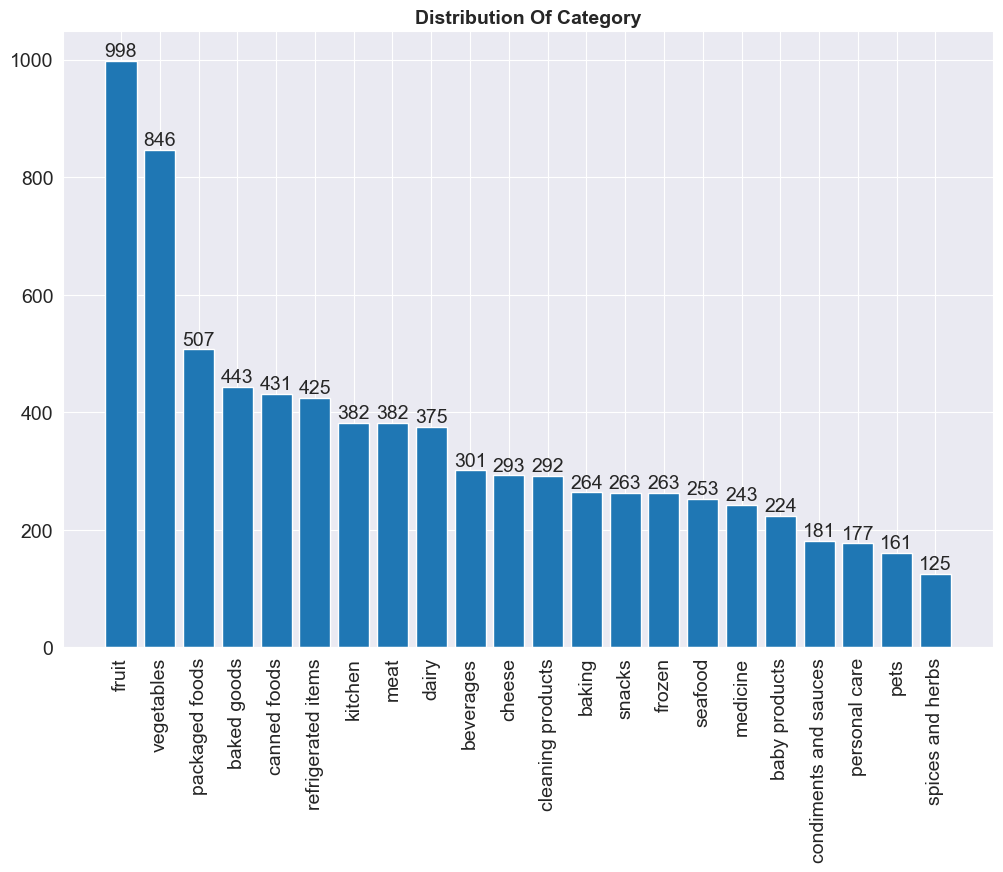

In [ ]:
myplot(df_sale,"category")

### Question 7: What are the top payment type?

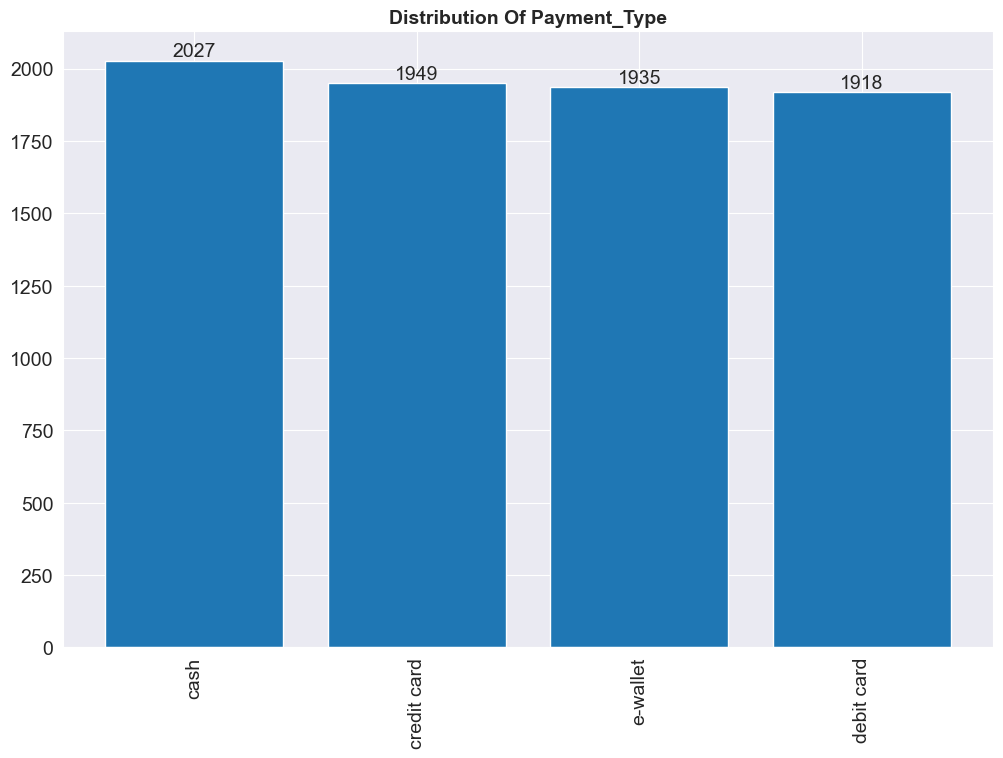

In [ ]:
myplot(df_sale,"payment_type")

### Question 8: Which customer type buys most frequently?

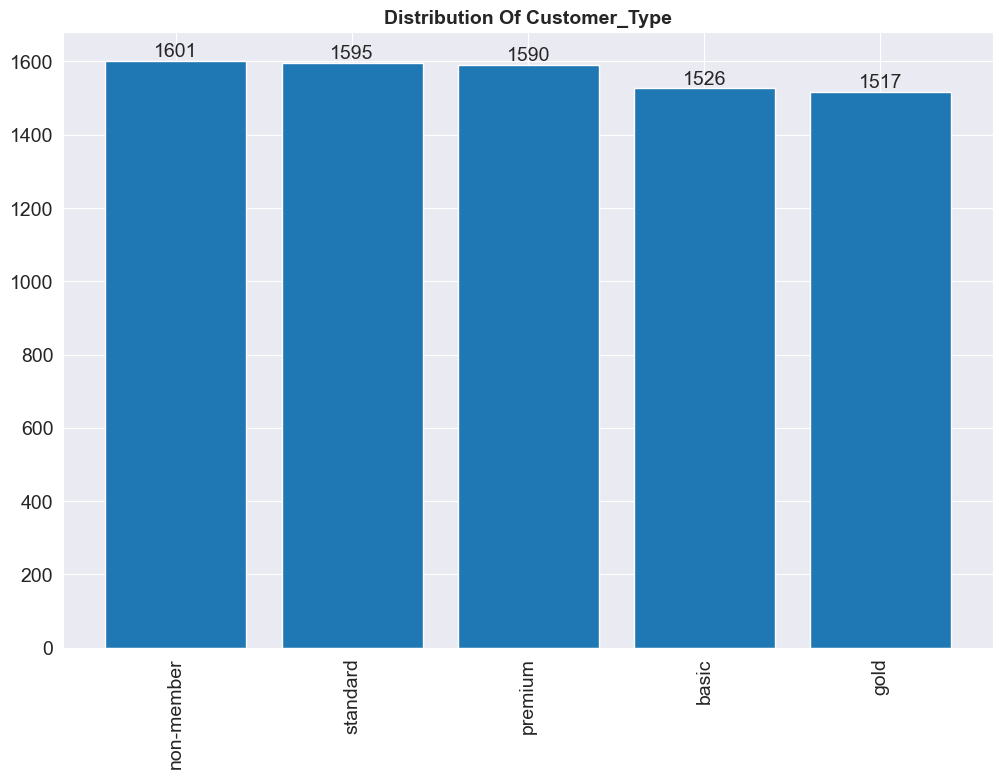

In [ ]:
myplot(df_sale,"customer_type")

### Question 9: Which day of the week record most sales ?

In [25]:
df_sale=time_format(df_sale, "timestamp")

In [27]:
# days in order
days_in_order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

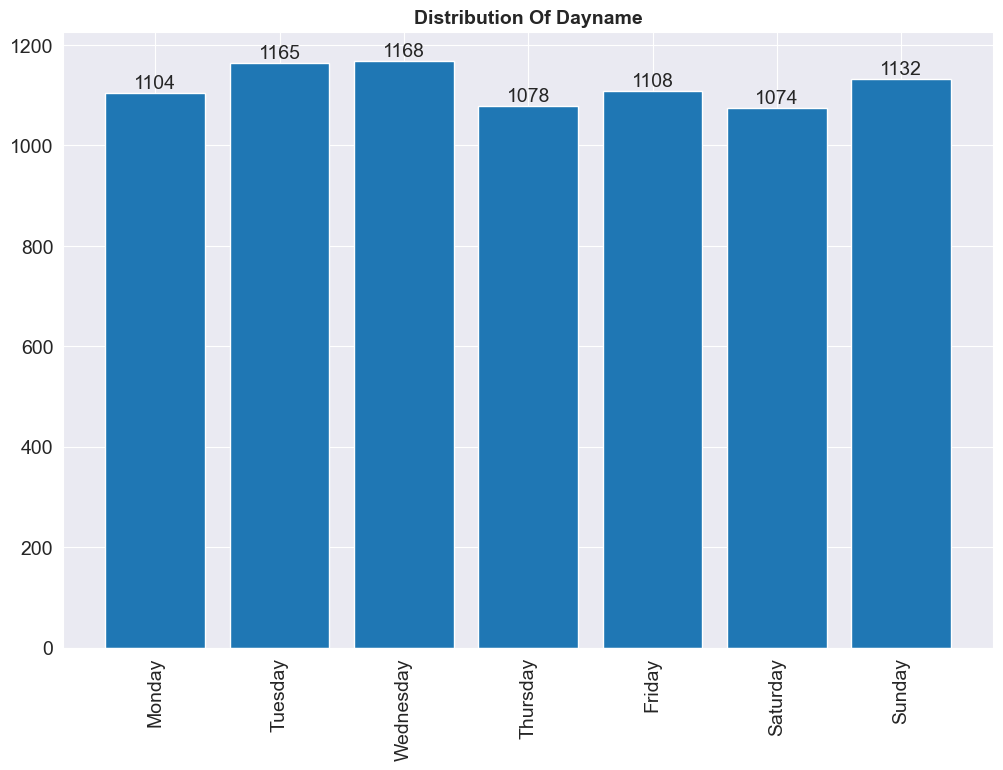

In [ ]:
myplot(df_sale,"dayname", order = days_in_order)

### Qustion 10: What is the hourly trend for sales recorded?

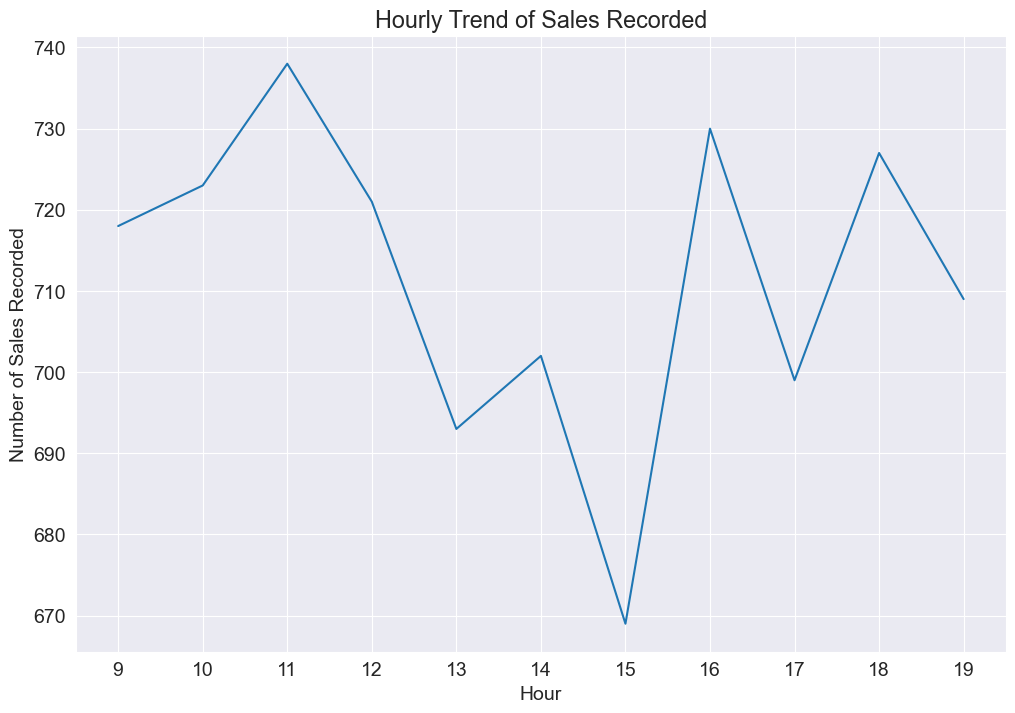

In [ ]:
line_plot(df_sale,"hour", "Hourly Trend of Sales Recorded","Hour","Number of Sales Recorded")

--- 
From the above, we can conclude that
* Fruit & vegetables are the 2 most frequently bought product categories 
* Non-members & standard are the most frequent buyers within the store
* Tuesday and Thursday are the two most frequent day for shopping 
* Cash is the most frequently used payment method
* The hour of 11 has the highest sale recorded and sale mostly drop from the hour of 11 to V-turn at hour of 15.



## Section 6 Multivariate Analysis<a id='ma'></a>

#### Question 11: How does the trend for stock level and total sale differ per hour?

In [80]:
df_agg= merged_df.groupby(['timestamp']).agg({'estimated_stock_pct': 'mean','total': 'mean'}).reset_index()
df_agg.head()

,timestamp,estimated_stock_pct,total
0,2022-03-01 09:00:00,0.50,6.97
1,2022-03-01 10:00:00,0.52,5.44
2,2022-03-01 11:00:00,0.50,6.64
3,2022-03-01 12:00:00,0.51,6.05
4,2022-03-01 13:00:00,0.51,7.16


In [81]:
df_agg = df_agg.set_index('timestamp')
colum = ["estimated_stock_pct","total"]

---
> We can see that the average `total` sale for each hour is relative higher than that of `estimated_stock_pct`. We will use `MinMaxScaler` to scale the value to fall from `0` to `1`

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_agg[colum] = scaler.fit_transform(df_agg[colum] )
df_agg.head()

,estimated_stock_pct,total
timestamp,,
2022-03-01 09:00:00,0.38,0.47
2022-03-01 10:00:00,0.62,0.22
2022-03-01 11:00:00,0.39,0.42
2022-03-01 12:00:00,0.56,0.32
2022-03-01 13:00:00,0.46,0.50


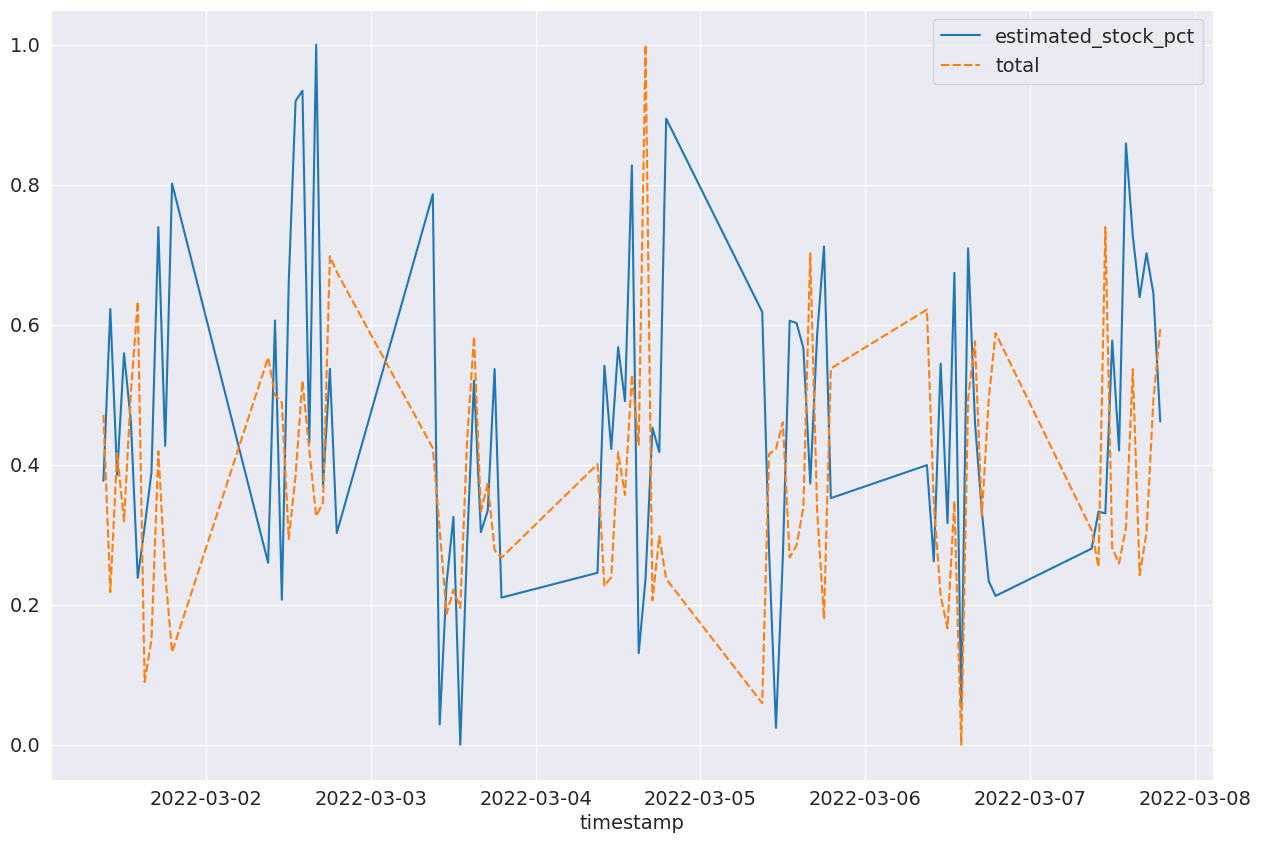

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df_agg, ax=ax)
plt.savefig('gradient_pred.jpg')
plt.show()

####  Question 12: What is the total quantity sold per category?

In [ ]:
aggregate_data(df_sale, "category", "quantity", stat= "sum")

,category,quantity
20,spices and herbs,304
16,pets,395
7,condiments and sauces,450
15,personal care,455
0,baby products,543
13,medicine,602
2,baking,648
19,snacks,652
9,frozen,660
18,seafood,669


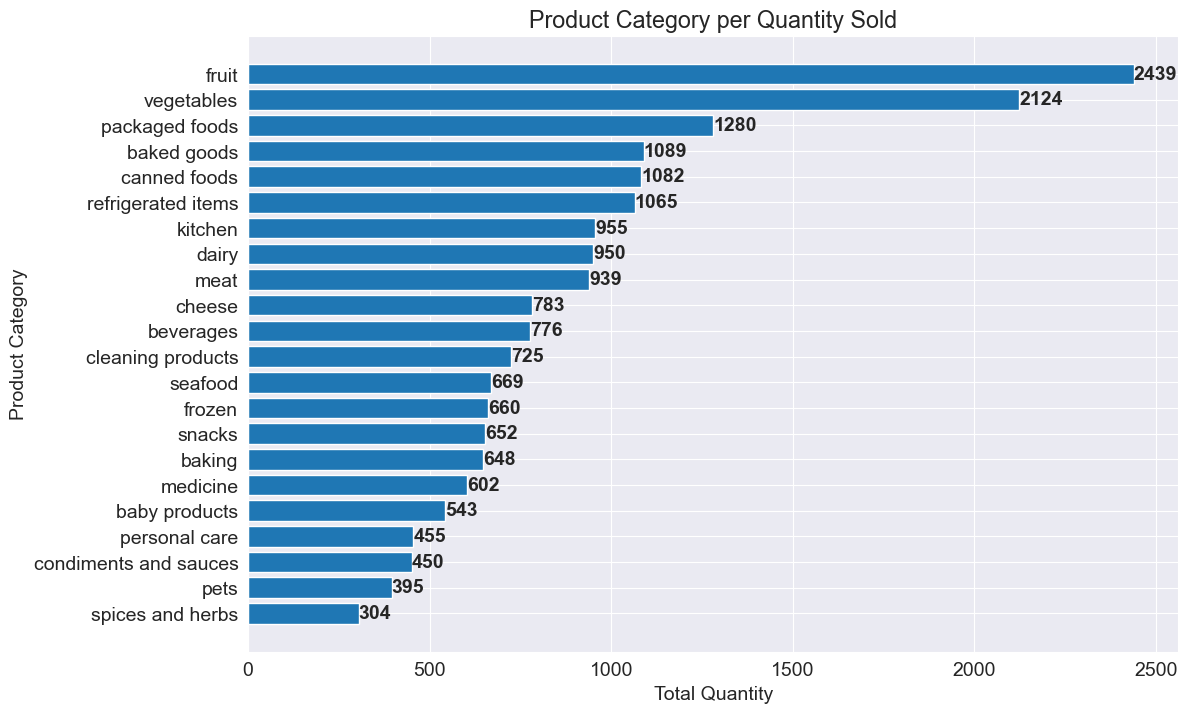

In [ ]:
bar_chart(aggregate_data(df_sale, "category", "quantity", stat= "sum"), "quantity", 'category', "Product Category per Quantity Sold","Total Quantity" , 'Product Category')

#### Question 13: What is the total sales per category?

In [ ]:
aggregate_data(df_sale, "category", "total", stat= "sum")

,category,total
20,spices and herbs,946.46
19,snacks,1555.18
7,condiments and sauces,3111.60
2,baking,3451.82
15,personal care,4111.45
16,pets,4205.95
21,vegetables,5070.46
10,fruit,6124.21
14,packaged foods,6373.70
9,frozen,6590.10


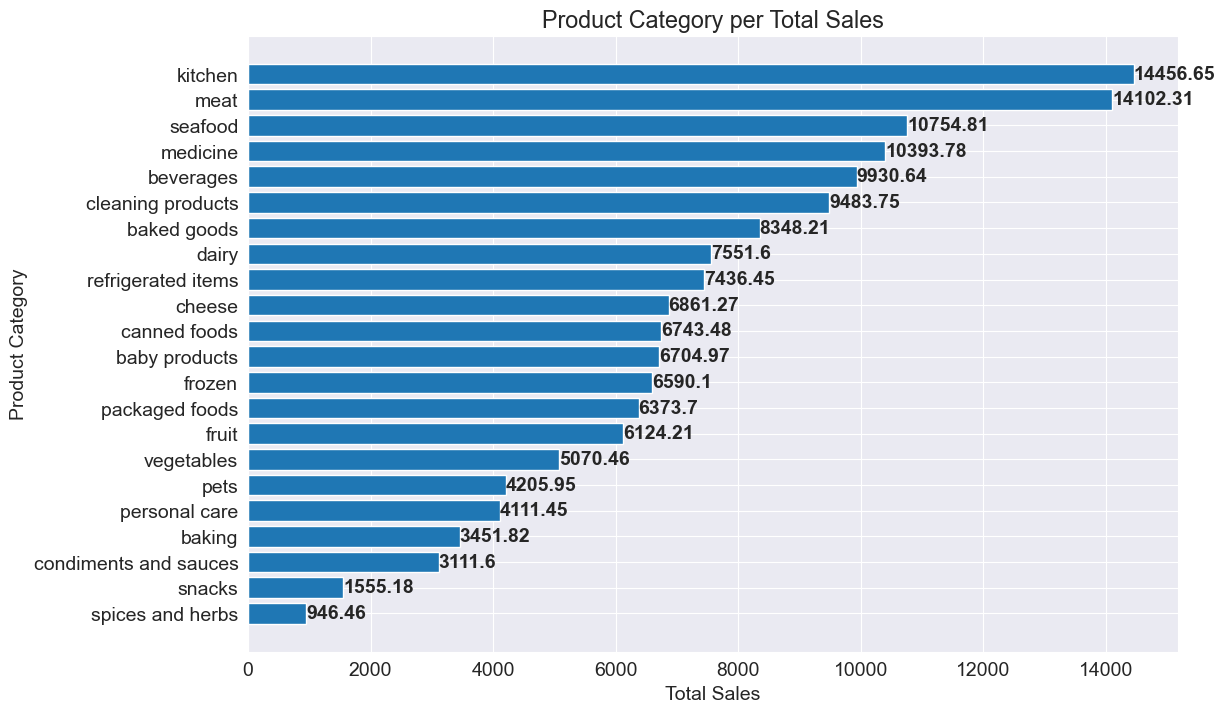

In [ ]:
bar_chart(aggregate_data(df_sale, "category", "total", stat= "sum"), "total", 'category', "Product Category per Total Sales","Total Sales" , 'Product Category')

#### Question 14 : What is the average sale per product category?

In [ ]:
aggregate_data(df_sale, "category", "total", stat= "mean")

,category,total
19,snacks,5.91
21,vegetables,5.99
10,fruit,6.14
20,spices and herbs,7.57
14,packaged foods,12.57
2,baking,13.08
4,canned foods,15.65
7,condiments and sauces,17.19
17,refrigerated items,17.50
1,baked goods,18.84


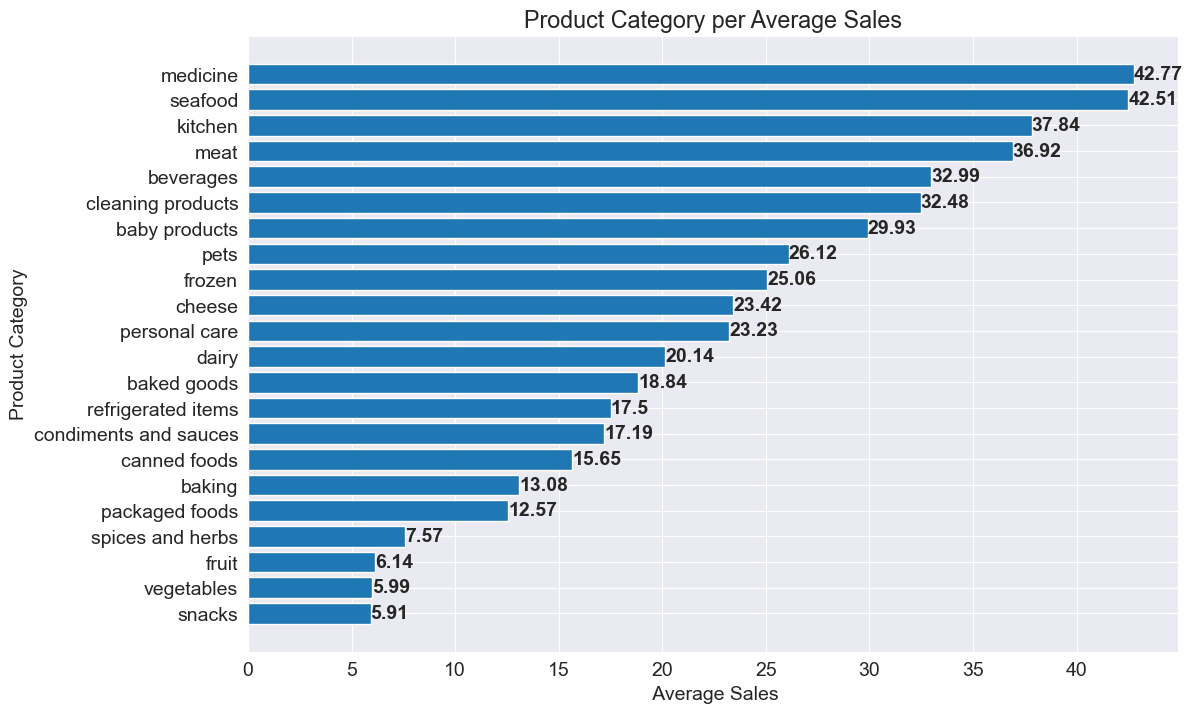

In [ ]:
bar_chart(aggregate_data(df_sale, "category", "total", stat= "mean"), "total", 'category', "Product Category per Average Sales"," Average Sales" , 'Product Category')

#### Question 15 : What is the average spending per customer type?

In [ ]:
aggregate_data(df_sale, "customer_type", "total", stat= "mean")

,customer_type,total
0,basic,19.38
4,standard,19.68
1,gold,19.74
2,non-member,19.83
3,premium,19.91


#### Question 16 : What is the average transaction per payment type?

In [ ]:
aggregate_data(df_sale, "payment_type", "total", stat= "mean")

,payment_type,total
3,e-wallet,18.97
2,debit card,19.30
1,credit card,20.17
0,cash,20.37


---
* `Premium` customers have highest average spending. There is no slight difference in the average  spending amount of customers. Though `non-member` customers buy frequently, however the `average` spending of `premium` customer are higher than the average spending of `non-member`. 
*  `Medicine` has the highest average total sales
*`Cash` has the highest average total sales
* `Kitchen`, `meat` and `seafood` are the top three product categories by total sales amount
* `Fruit` & `vegetables` are the top 2 bought product categories by quantity sold

####  Question 17 : What is the hourly trend of sale recorded for each day?

In [ ]:
df_groupby_hour_day = df_sale.groupby(["hour","dayname"]).size().reset_index(name='hour_count')
df_groupby_hour_day.head()

,hour,dayname,hour_count
0,9,Friday,113
1,9,Monday,103
2,9,Saturday,83
3,9,Sunday,112
4,9,Thursday,87


---
we will create facet grid with `dayname` using `sns.FacetGrid`, then plot hourly sales for each day

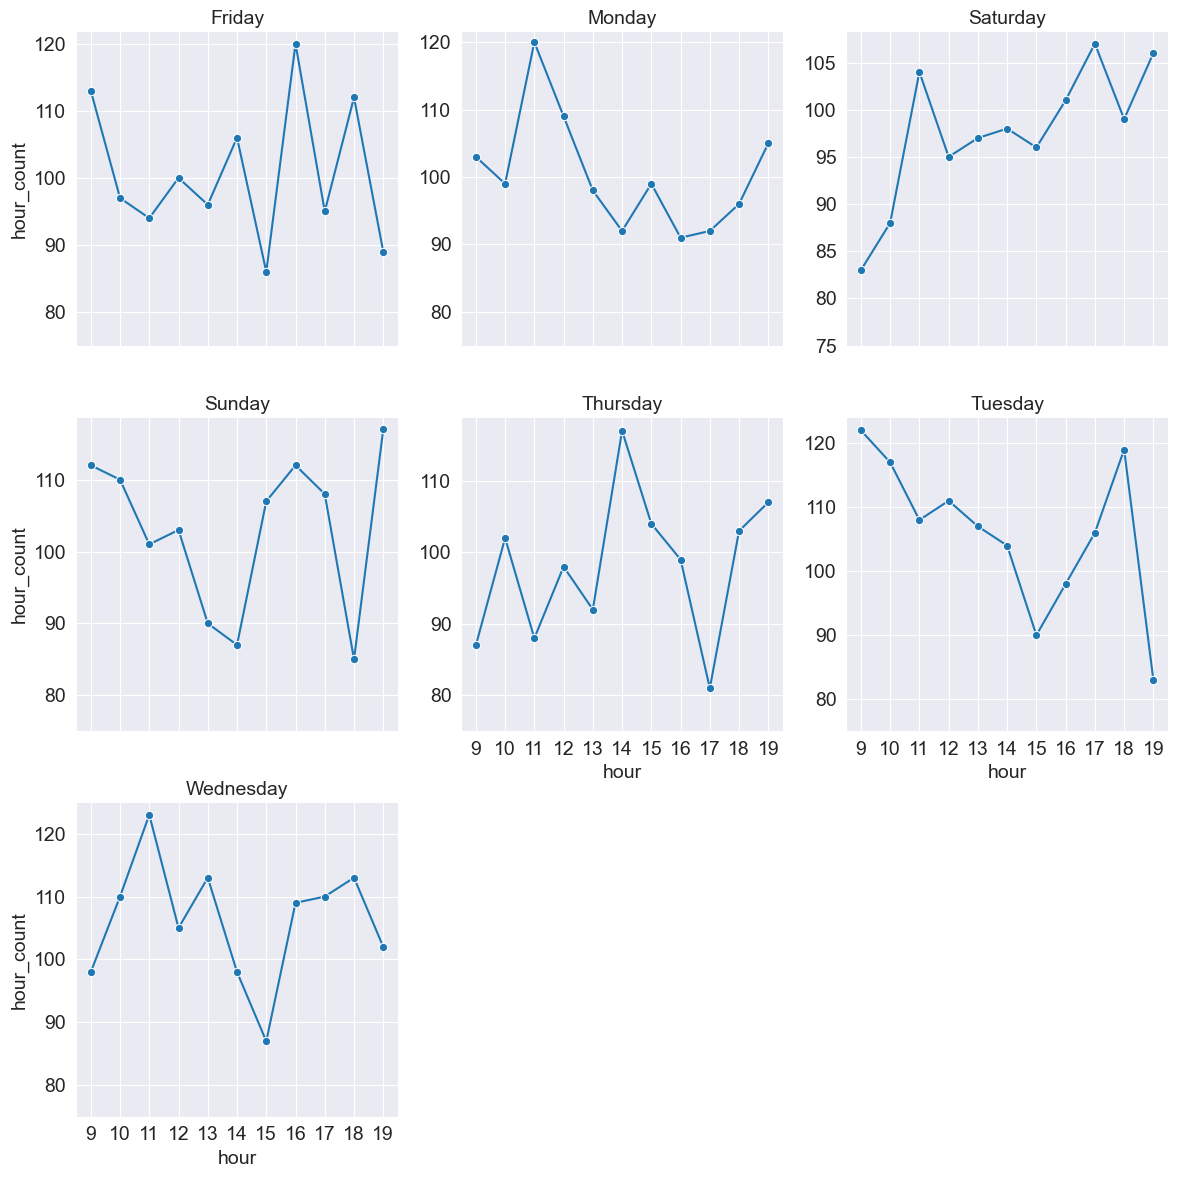

In [ ]:
# Create a facet grid with 'dayname' on the y-axis and 'hour' on the x-axis
g = sns.FacetGrid(df_groupby_hour_day, col="dayname", col_wrap=3, height=4, sharey=False)

# Define custom x-axis tick labels for each subplot
hour_labels = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Map the data to a lineplot in the facet grid and set x-axis ticks and labels
g.map(sns.lineplot, "hour", "hour_count", marker="o")
g.set(ylim=(75, None), xticks=hour_labels)  # Set y-axis limit and x-axis properties

# Set titles for each subplot based on dayname
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Question 18 : What is the distribution of product category sold per each day?

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'dayname': ['Monday', 'Wednesday', 'Tuesday', 'Thursday', 'Sunday', 'Friday', 'Saturday'],
        'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A']}
df_sale = pd.DataFrame(data)

# Define the custom day order
days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'dayname' column to a categorical variable with the custom order
df_sale['dayname'] = pd.Categorical(df_sale['dayname'], categories=days_in_order, ordered=True)

# Create a pivot table to count the occurrences of each product on each day
pivot_table = df_sale.pivot_table(index='dayname', columns='category', aggfunc='size', fill_value=0)

# Display the resulting pivot table
print(pivot_table)


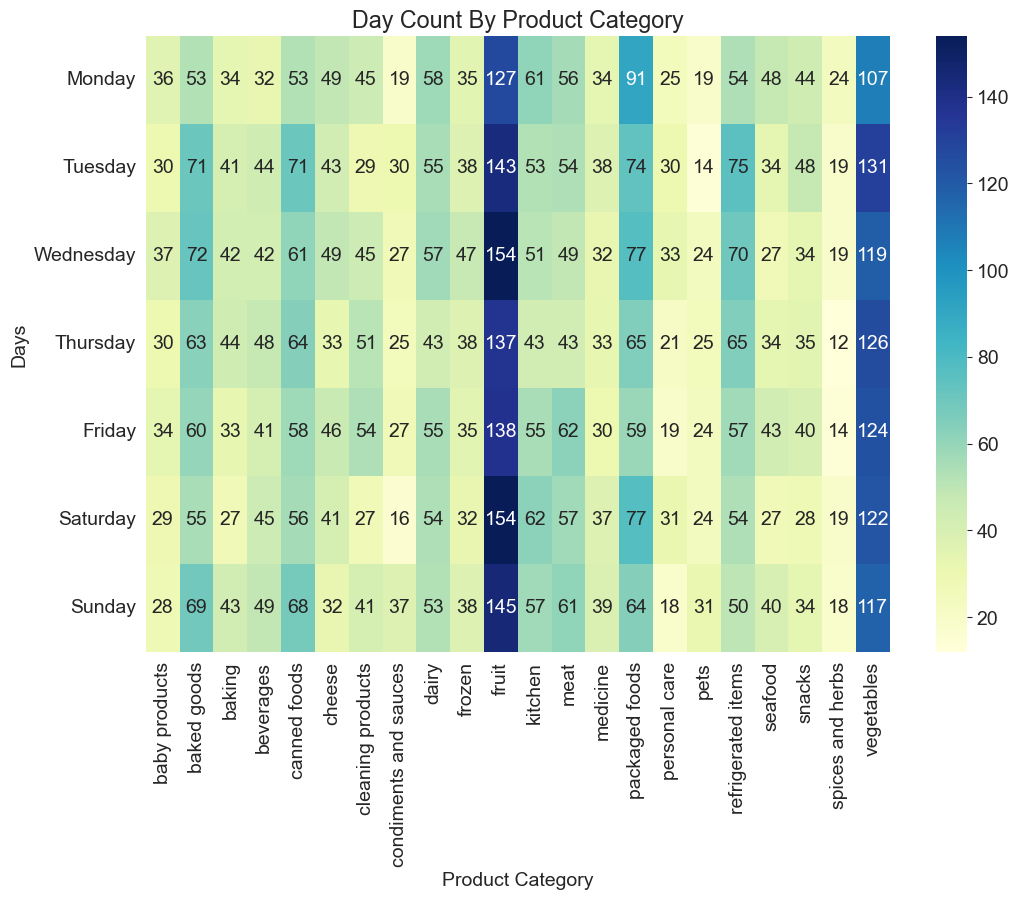

In [30]:
# Create a pivot table to count the occurrences of each product on day
df_sale['dayname'] = pd.Categorical(df_sale['dayname'], categories=days_in_order, ordered=True) # order from Monday to Sunday
pivot_table = df_sale.pivot_table(index='dayname', columns='category', aggfunc='size', fill_value=0)
 # order index from Monday to Sunday
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Day Count By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Days')
plt.savefig('pivot.jpg')
plt.show()

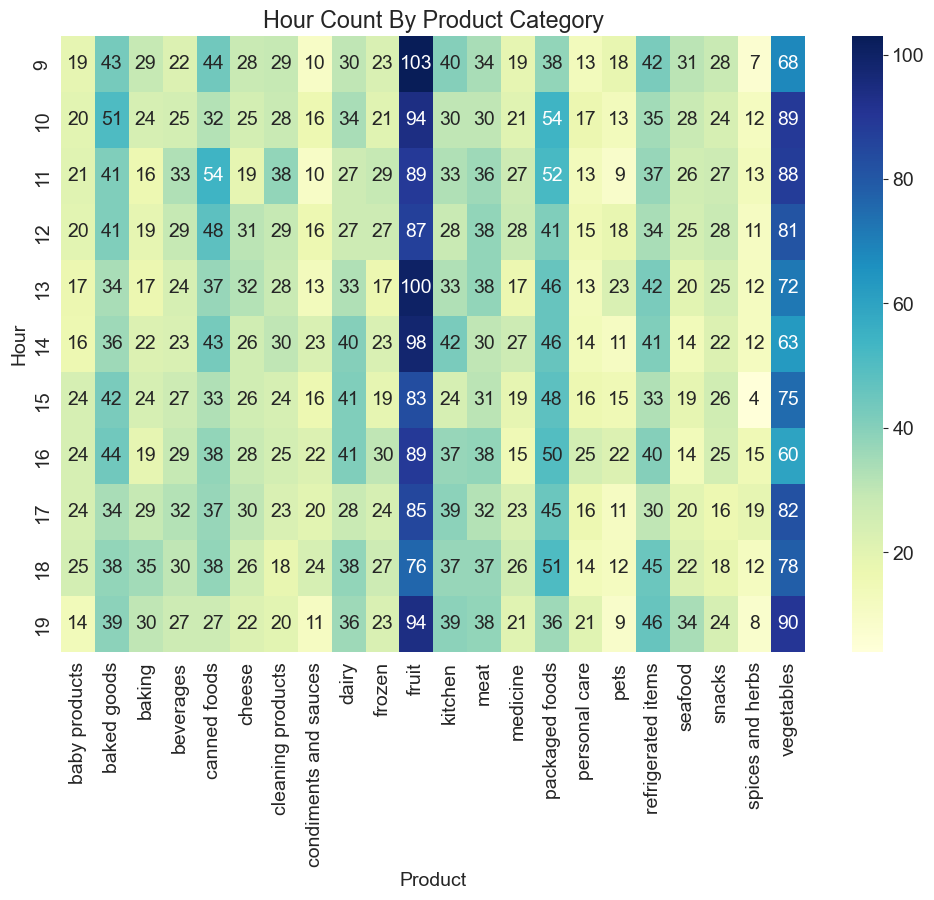

In [32]:
# Create a pivot table to count the occurrences of each product on day
pivot_table = df_sale.pivot_table(index='hour', columns='category', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Hour Count By Product Category')
plt.xlabel('Product')
plt.ylabel('Hour')
plt.savefig('pivothour.jpg')          
plt.show()

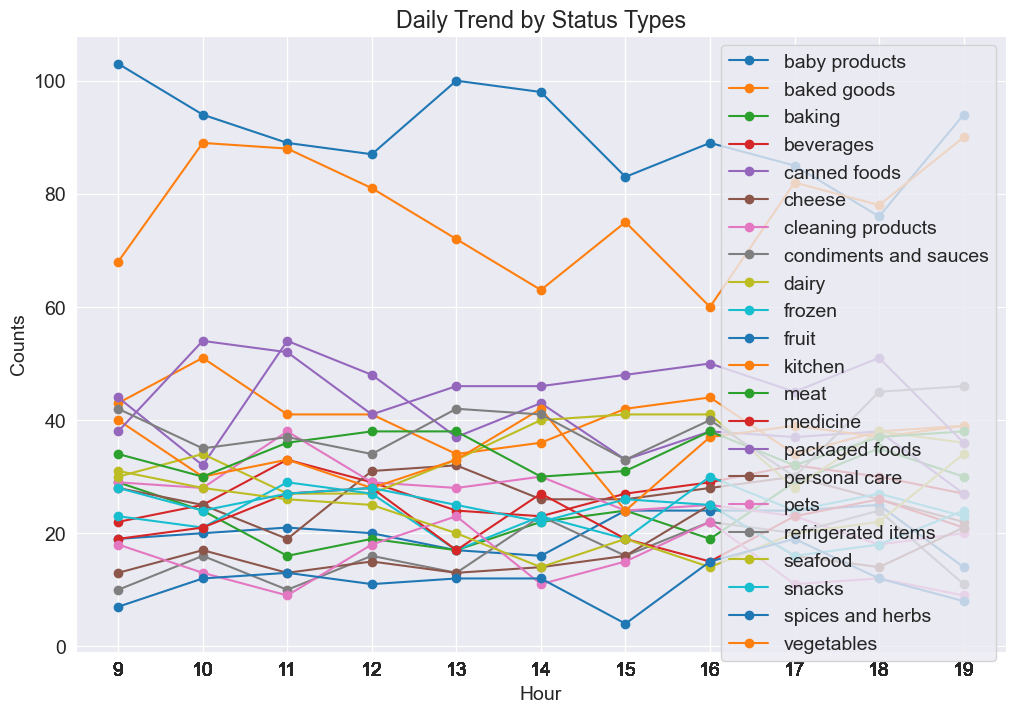

In [ ]:
plot_hour_trend(df_sale,"hour", "category")

In [25]:
merged_df = time_format(merged_df,"timestamp")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,total,temperature,category,unit_price,hour,dayname,day_of_month
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57,-0.02885,kitchen,11.19,9,Tuesday,1
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.02885,vegetables,1.49,9,Tuesday,1
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,0.00,-0.02885,baby products,14.19,9,Tuesday,1
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,0.00,-0.02885,beverages,20.19,9,Tuesday,1
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,0.00,-0.02885,pets,8.19,9,Tuesday,1


In [26]:
merged_df = merged_df.set_index("timestamp")
merged_df.head()

,product_id,estimated_stock_pct,quantity,total,temperature,category,unit_price,hour,dayname,day_of_month
timestamp,,,,,,,,,,
2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,33.57,-0.02885,kitchen,11.19,9,Tuesday,1
2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.02885,vegetables,1.49,9,Tuesday,1
2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,0.00,-0.02885,baby products,14.19,9,Tuesday,1
2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,0.00,-0.02885,beverages,20.19,9,Tuesday,1
2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,0.00,-0.02885,pets,8.19,9,Tuesday,1


In [ ]:
merged_df_no_sale = merged_df[merged_df["total"] == 0]
merged_df_no_sale.head()

,product_id,estimated_stock_pct,customer_type,quantity,total,temperature,category,unit_price,hour,dayname,day_of_month
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,No Sale,0.0,0.0,-0.02885,baby products,14.19,9,Tuesday,1
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,No Sale,0.0,0.0,-0.02885,beverages,20.19,9,Tuesday,1
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,No Sale,0.0,0.0,-0.02885,pets,8.19,9,Tuesday,1
5,0998699f-2fec-454e-b8b0-4f701947fef6,0.10,No Sale,0.0,0.0,-0.02885,beverages,15.99,9,Tuesday,1
6,0cb046e3-a86b-47ae-9751-3b0f9c596f99,0.83,No Sale,0.0,0.0,-0.02885,pets,11.19,9,Tuesday,1


In [ ]:
merged_df_sale = merged_df[merged_df["total"] != 0]
merged_df_sale.head()

,product_id,estimated_stock_pct,customer_type,quantity,total,temperature,category,unit_price,hour,dayname,day_of_month
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,premium,3.0,33.57,-0.02885,kitchen,11.19,9,Tuesday,1
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,standard,3.0,4.47,-0.02885,vegetables,1.49,9,Tuesday,1
8,0ddc2379-adba-4fb0-aa97-19fcafc738a1,0.35,premium,3.0,11.97,-0.02885,fruit,3.99,9,Tuesday,1
13,146d5e4d-992a-4db7-904d-b8af359b80a7,0.48,basic,1.0,8.19,-0.02885,baking,8.19,9,Tuesday,1
14,14736243-d346-438f-9535-d80fcb9f3882,0.67,gold,6.0,4.47,-0.02885,fruit,1.49,9,Tuesday,1


In [ ]:
merged_df_no_sale_agg = merged_df_no_sale.groupby(["hour"]).agg({'estimated_stock_pct': 'mean',"temperature":"mean"}).reset_index()
merged_df_no_sale_agg.head()

,hour,estimated_stock_pct,temperature
0,9,0.505321,-0.123836
1,10,0.495415,-0.165798
2,11,0.480118,-0.740474
3,12,0.513502,0.014528
4,13,0.501268,-0.270683


In [ ]:
merged_df_sale_agg=merged_df_sale.groupby(["hour"]).agg({'estimated_stock_pct': 'mean',"temperature":"mean"}).reset_index()
merged_df_sale_agg.head()

,hour,estimated_stock_pct,temperature
0,9,0.496279,-0.204138
1,10,0.504217,-0.154248
2,11,0.515850,-0.786004
3,12,0.492140,0.006019
4,13,0.533076,-0.257979


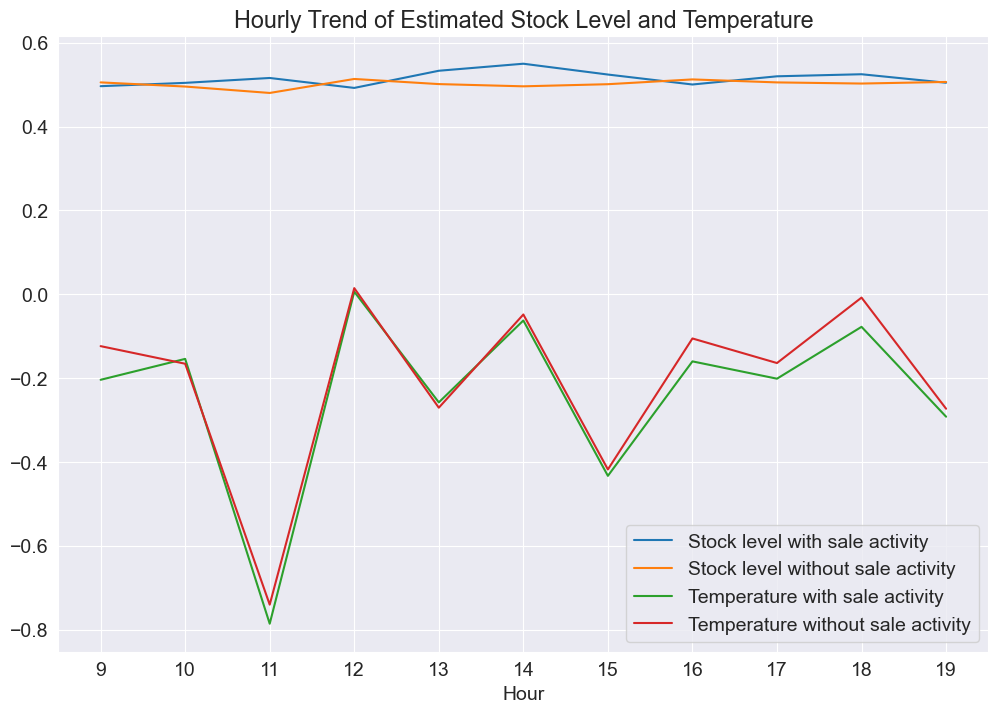

In [ ]:
plt.plot(merged_df_sale_agg["hour"], merged_df_sale_agg["estimated_stock_pct"], label= "Stock level with sale activity")
plt.plot(merged_df_no_sale_agg["hour"], merged_df_no_sale_agg["estimated_stock_pct"], label= "Stock level without sale activity")

plt.plot(merged_df_sale_agg["hour"], merged_df_sale_agg["temperature"], label= "Temperature with sale activity")
plt.plot(merged_df_no_sale_agg["hour"], merged_df_no_sale_agg["temperature"], label= "Temperature without sale activity")
plt.title("Hourly Trend of Estimated Stock Level and Temperature")
plt.xlabel("Hour")
plt.xticks(merged_df_no_sale_agg["hour"])
plt.legend()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10464\2830827895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), fmt='.2g',annot=True)


<Axes: >

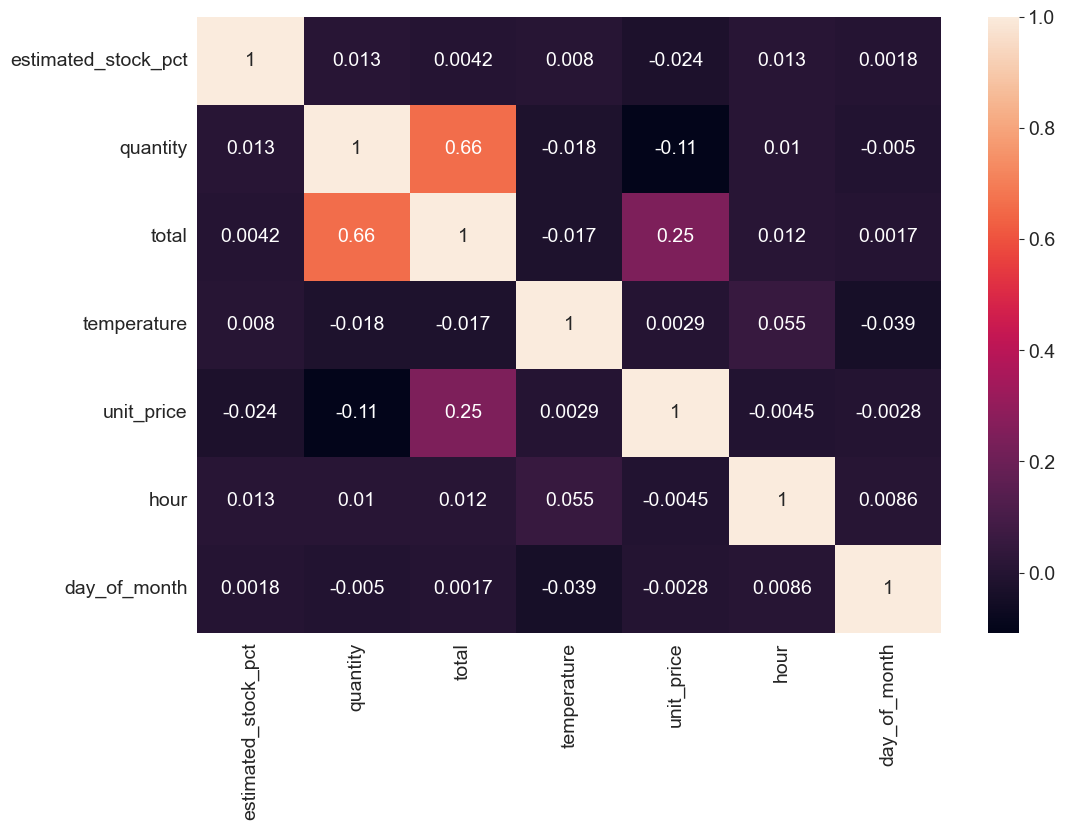

In [34]:
sns.heatmap(merged_df.corr(), fmt='.2g',annot=True)

There is multicollinearity between `total` and `quantity`

## Section 7 - Statistical Test <a id='sa'></a>

   ####  Hypothesis 1: Gala Groceris want to know if there is difference in the average sale amount between customers who use credit cards and customers who use cash.

$H_0$: There is no difference in the average sale amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average sale amount between customers who use credit cards and customers who use cash.

#### Set the significance level:

In [ ]:
# choose significance level of 5%
significance_level = 0.05

In [ ]:
credit_card = df_sale[df_sale['payment_type'] == "credit card"]['total']
cash = df_sale[df_sale['payment_type'] == "cash"]['total']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=-0.35375458985687686, pvalue=0.7235416517442294)

With a p-value (0.723) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-0.353), **fail to reject the null hypothesis**.

Therefore, you cannot conclude at the 5% significance level that There is a difference in the average sale amount between customers who use credit cards and customers who use cash.

####   Hypothesis 2: Is the estimated_stock_pct of hour with sale activities greater than hour without sale activities for specific product.?

$H_0$: The mean estimated_stock_pct of hour with sale activities is less than or equal that of the mean estimated_stock_pct of hour without sale activities

$H_A$: The mean estimated_stock_pct of hour with sale activities greater than that of the mean estimated_stock_pct of hour without sale activities

In [ ]:
stats.ttest_ind(a=merged_df_sale["estimated_stock_pct"], b=merged_df_no_sale["estimated_stock_pct"], equal_var=False, alternative='greater')

Ttest_indResult(statistic=2.4730723113771544, pvalue=0.006708919942498355)

With a p-value (0.0067) being less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.47), **we reject the null hypothesis** in favour of the **alternative hypothesis**

Therefore, you can conclude at the 5% significance level that the `mean estimated_stock_pct` of products with sale activities is greater than  the mean `estimated_stock_pct` of products without sale activities

## Task 2 - Data Modelling <a id='dm'></a>

### Section 1 - Removing Outliers <a id='ro'></a>

In [27]:
def remove_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range) for the specified column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only the rows within the bounds
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

In [28]:
merged_df = remove_outliers(merged_df,"total")
merged_df

,product_id,estimated_stock_pct,quantity,total,temperature,category,unit_price,hour,dayname,day_of_month
timestamp,,,,,,,,,,
2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,4.47,-0.028850,vegetables,1.49,9,Tuesday,1
2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,0.00,-0.028850,baby products,14.19,9,Tuesday,1
2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,0.00,-0.028850,beverages,20.19,9,Tuesday,1
2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,0.00,-0.028850,pets,8.19,9,Tuesday,1
2022-03-01 09:00:00,0998699f-2fec-454e-b8b0-4f701947fef6,0.10,0.0,0.00,-0.028850,beverages,15.99,9,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...
2022-03-07 19:00:00,e68b76ae-951d-4d82-8168-e78d46711883,0.20,0.0,0.00,-0.165077,snacks,4.99,19,Monday,7
2022-03-07 19:00:00,e8e2570a-283e-41f4-9938-589217280f22,0.59,1.0,8.99,-0.165077,meat,8.99,19,Monday,7
2022-03-07 19:00:00,ec0bb9b5-45e3-4de8-963d-e92aa91a201e,0.34,0.0,0.00,-0.165077,condiments and sauces,5.49,19,Monday,7


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8726 entries, 2022-03-01 09:00:00 to 2022-03-07 19:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           8726 non-null   object 
 1   estimated_stock_pct  8726 non-null   float64
 2   quantity             8726 non-null   float64
 3   total                8726 non-null   float64
 4   temperature          8726 non-null   float64
 5   category             8726 non-null   object 
 6   unit_price           8726 non-null   float64
 7   hour                 8726 non-null   int64  
 8   dayname              8726 non-null   object 
 9   day_of_month         8726 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 749.9+ KB


In [30]:
merged_df.drop(columns=['product_id', "category",'dayname',"day_of_month" ], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,total,temperature,unit_price,hour
timestamp,,,,,,
2022-03-01 09:00:00,0.14,3.0,4.47,-0.02885,1.49,9
2022-03-01 09:00:00,0.67,0.0,0.00,-0.02885,14.19,9
2022-03-01 09:00:00,0.82,0.0,0.00,-0.02885,20.19,9
2022-03-01 09:00:00,0.05,0.0,0.00,-0.02885,8.19,9
2022-03-01 09:00:00,0.10,0.0,0.00,-0.02885,15.99,9


In [42]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(8726, 5)
(8726,)


In [43]:
X.columns

Index(['quantity', 'total', 'temperature', 'unit_price', 'hour'], dtype='object')

### Section 2 - Modelling <a id ='m'></a>

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
def cross_validate(X, y, K, split, model, scaler):
    accuracy = []

    for fold in range(0, K):

        # Create training and test samples
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

        # Scale X data
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Train model
        trained_model = model.fit(X_train, y_train)

        # Generate predictions on test sample
        y_pred = trained_model.predict(X_test)

        # Compute accuracy using mean absolute error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        accuracy.append(mae)
        print(f"Fold {fold + 1}: MAE = {mae:.3f}")

    average_mae = sum(accuracy) / len(accuracy)
    print(f"Average MAE: {average_mae:.2f}")

    return accuracy




In [34]:
scaler = StandardScaler()
model_reg = LinearRegression()
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()
model_gra = GradientBoostingRegressor()
model_xtra = ExtraTreesRegressor()
model_ada = AdaBoostRegressor()
model_xgb = XGBRegressor()
svr_model = SVR()

#### Linear

In [36]:
mae_leg= cross_validate(X, y, 10, 0.2, model_reg, scaler)

Fold 1: MAE = 0.227
Fold 2: MAE = 0.227
Fold 3: MAE = 0.227
Fold 4: MAE = 0.227
Fold 5: MAE = 0.227
Fold 6: MAE = 0.227
Fold 7: MAE = 0.227
Fold 8: MAE = 0.227
Fold 9: MAE = 0.227
Fold 10: MAE = 0.227
Average MAE: 0.23


#### DecisionTree

In [37]:
mae_tree= cross_validate(X, y, 10, 0.2, model_tree, scaler)

Fold 1: MAE = 0.287
Fold 2: MAE = 0.288
Fold 3: MAE = 0.288
Fold 4: MAE = 0.288
Fold 5: MAE = 0.289
Fold 6: MAE = 0.288
Fold 7: MAE = 0.288
Fold 8: MAE = 0.288
Fold 9: MAE = 0.287
Fold 10: MAE = 0.288
Average MAE: 0.29


#### RandomForest

In [38]:
mae_forest= cross_validate(X, y, 10, 0.2, model_forest, scaler)

Fold 1: MAE = 0.255
Fold 2: MAE = 0.256
Fold 3: MAE = 0.255
Fold 4: MAE = 0.255
Fold 5: MAE = 0.255
Fold 6: MAE = 0.255
Fold 7: MAE = 0.255
Fold 8: MAE = 0.256
Fold 9: MAE = 0.255
Fold 10: MAE = 0.255
Average MAE: 0.26


#### ExtraTrees

In [39]:
mae_xtra= cross_validate(X, y, 10, 0.2, model_xtra, scaler)

Fold 1: MAE = 0.272
Fold 2: MAE = 0.272
Fold 3: MAE = 0.272
Fold 4: MAE = 0.272
Fold 5: MAE = 0.272
Fold 6: MAE = 0.273
Fold 7: MAE = 0.272
Fold 8: MAE = 0.272
Fold 9: MAE = 0.272
Fold 10: MAE = 0.272
Average MAE: 0.27


#### Extreme Gradient Boosting

In [40]:
mae_xgb= cross_validate(X, y, 10, 0.2, model_xgb, scaler)

Fold 1: MAE = 0.244
Fold 2: MAE = 0.244
Fold 3: MAE = 0.244
Fold 4: MAE = 0.244
Fold 5: MAE = 0.244
Fold 6: MAE = 0.244
Fold 7: MAE = 0.244
Fold 8: MAE = 0.244
Fold 9: MAE = 0.244
Fold 10: MAE = 0.244
Average MAE: 0.24


#### AdaBoost

In [42]:
mae_ada= cross_validate(X, y, 10, 0.2, model_ada, scaler)

Fold 1: MAE = 0.227
Fold 2: MAE = 0.227
Fold 3: MAE = 0.227
Fold 4: MAE = 0.227
Fold 5: MAE = 0.227
Fold 6: MAE = 0.227
Fold 7: MAE = 0.227
Fold 8: MAE = 0.227
Fold 9: MAE = 0.227
Fold 10: MAE = 0.227
Average MAE: 0.23


#### Gradient Boosting

In [43]:
mae_gra= cross_validate(X, y, 10, 0.2, model_gra, scaler)

Fold 1: MAE = 0.229
Fold 2: MAE = 0.229
Fold 3: MAE = 0.228
Fold 4: MAE = 0.229
Fold 5: MAE = 0.228
Fold 6: MAE = 0.228
Fold 7: MAE = 0.229
Fold 8: MAE = 0.229
Fold 9: MAE = 0.228
Fold 10: MAE = 0.228
Average MAE: 0.23


#### Support Vector Regressor

In [44]:
mae_svr= cross_validate(X, y, 10, 0.2, svr_model, scaler)

Fold 1: MAE = 0.228
Fold 2: MAE = 0.228
Fold 3: MAE = 0.228
Fold 4: MAE = 0.228
Fold 5: MAE = 0.228
Fold 6: MAE = 0.228
Fold 7: MAE = 0.228
Fold 8: MAE = 0.228
Fold 9: MAE = 0.228
Fold 10: MAE = 0.228
Average MAE: 0.23



This is very interesting though. We can see that the `mean absolute error` (MAE) is almost exactly the same each time for each model. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data, which is what we want. In other words, it shows a robust nature.

The `MAE` was chosen as a performance metric because it describes how closely the machine learning model was able to predict the exact value of `estimated_stock_pct`. However this value for MAE is not so good, but `AdaBoostRegressor`, `GradientBoostingRegressor` and `SVR` gave a lower MAE. We performance hyperparameter tuning before build the final model

### Section 3 - Hyperparameter Tuning <a id ='ht'></a>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### AdaBoost

In [48]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Create the GridSearchCV object with cross-validation
grid_search_ada = GridSearchCV(model_ada, param_grid, cv=5, n_jobs=-1)


grid_search_ada.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50}
Best Score: 0.00012983898332943333


In [49]:
pred = grid_search_ada.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
ada_mse = mean_squared_error(y_test, pred)
ada_rmse = np.sqrt(ada_mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", ada_mse)
print("Root Mean Squared Error:", ada_rmse)
print('R Squared', r2_score(y_test, pred))

Mean Absolute Error: 0.22708773265644625
Mean Squared Error: 0.07141320887273314
Root Mean Squared Error: 0.2672324996566345
R Squared 0.0007636157854424841


#### Gradient Boosting

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 2, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object with cross-validation
grid_search_gra = GridSearchCV(model_gra, param_grid, cv=5, n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search_gra.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.0001937510084947469


In [51]:
pred = grid_search_gra.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
gra_mse = mean_squared_error(y_test, pred)
gra_rmse = np.sqrt(gra_mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Error:", gra_mse)
print("Root Mean Squared Error:", gra_rmse)
print('R Squared', r2_score(y_test, pred))

Mean Absolute Error: 0.2274064989091923
Mean Absolute Error: 0.0715099415959689
Root Mean Squared Error: 0.2674134282267233
R Squared -0.0005898993152946286


#### SVR

In [52]:
# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object with cross-validation
grid_search_svr = GridSearchCV(svr_model, param_grid, cv=5)

# Fit the model to find the best hyperparameters
grid_search_svr.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: -0.0022250170953753033


In [53]:
pred = grid_search_svr.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
svr_mse = mean_squared_error(y_test, pred)
svr_rmse = np.sqrt(svr_mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print('R Squared', r2_score(y_test, pred)) 

Mean Absolute Error: 0.2269841855949657
Mean Squared Error: 0.07131215831272467
Root Mean Squared Error: 0.2670433641053914
R Squared 0.0021775474347774937


After tuning the parameters, `svr` gave a lower mae than that of `Gradient Boosting` and `Adaboost`. However for simplicity 
we will fit the best parameter for `Adaboost` for final model 

### Section 4- Final Model <a id ='fm'></a>

In [46]:
model_ada = AdaBoostRegressor(learning_rate=1.0, loss = 'linear',n_estimators = 50)
model_ada.fit(X_train, y_train)

AdaBoostRegressor()

In [48]:
pred = model_ada.predict(X_test)
mae = round(mean_absolute_error(y_true=y_test, y_pred=pred),3)
rf_mse = round(mean_squared_error(y_test, pred),3)
rf_rmse = np.sqrt(rf_mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print('R Squared', r2_score(y_test, pred))

Mean Absolute Error: 0.227
Mean Squared Error: 0.071
Root Mean Squared Error: 0.2664582518894845
R Squared 0.0008234643481005444


In [49]:
df = pd.DataFrame({'True_value':y_test, 'Predicted':pred})
df.head()

,True_value,Predicted
timestamp,,
2022-03-01 18:00:00,0.363333,0.501938
2022-03-07 14:00:00,0.940000,0.506850
2022-03-04 11:00:00,0.510000,0.492750
2022-03-03 17:00:00,0.460000,0.503642
2022-03-05 09:00:00,0.470000,0.507036


In [50]:
df.describe()

,True_value,Predicted
count,1746.000000,1746.000000
mean,0.496222,0.503401
std,0.267411,0.006160
min,0.010000,0.474960
25%,0.283750,0.501938
50%,0.490000,0.503642
75%,0.710000,0.503642
max,1.000000,0.567641


The final model gave `mean absolute error` (MAE) of 0.2195 which suggests that, on average, the model's predictions are off from the actual values by approximately 0.2195 units. Comparing the `MAE` to the mean of `estimated_stock_pct`  (0.5059), you can say that, on average, about 43.4% of the mean value away from the actual values.

This value for `MAE` is not so good. In an ideal world, we would want the MAE to be as low as possible. At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the the dataset needs to be further engineered, or more datasets need to be added.



### Section 5 - Model Visualization <a id ='mv'></a>

In [73]:
df.to_csv("Prediction.csv")

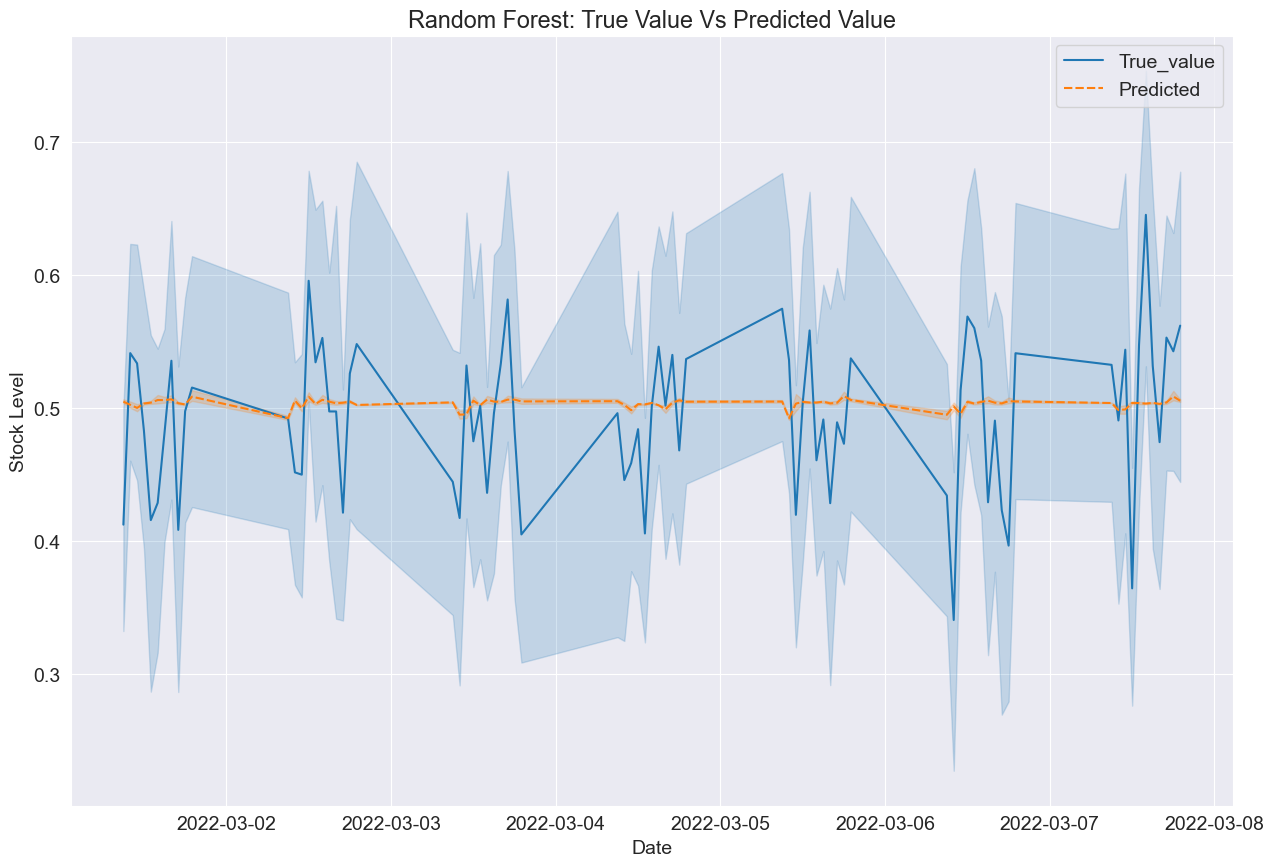

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df, ax=ax)
plt.xlabel("Date")
plt.ylabel("Stock Level")
plt.title("Random Forest: True Value Vs Predicted Value")
plt.savefig('random.jpg')
plt.show()

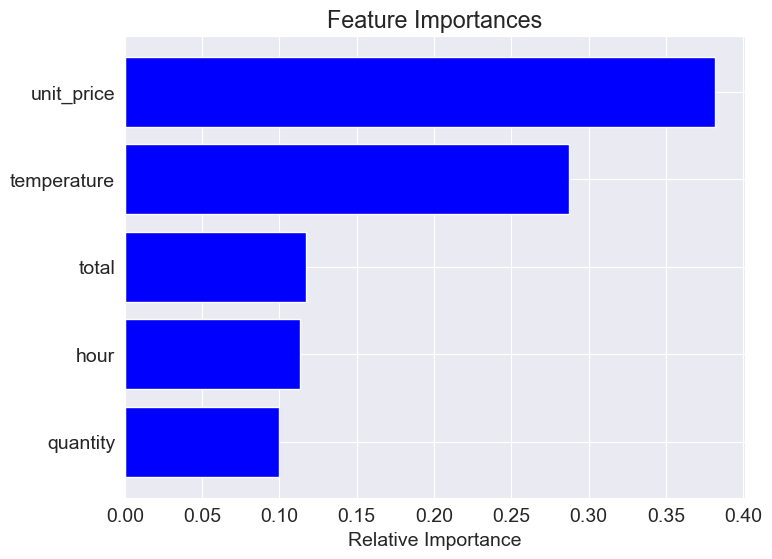

In [54]:
features = [i.split("__")[0] for i in X.columns]
importances = model_ada.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

- `unit_price` and `temperature` have more relative important than the other features, thus having a relatively stronger influence on the model's prediction. 

With these insights, we can now report this back to the business

### Section 5 - Save Model <a id ='sm'></a>

In [55]:
import pickle
model_filename = 'stock_level_prediction.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model_ada, model_file)


In [56]:
import joblib
model_filename = 'stock_level_prediction.joblib'
joblib.dump(model_ada, model_filename)

['stock_level_prediction.joblib']

## Conclusion and Recommendation <a id ='cr'></a>

At the end of this project, we were able to draw the following unique insights:

* The distribution of `temperature` and `estimated_stock_pct` is normal distribution, this means the `mean` and the `median` are equal, and the data points are evenly distributed on both side of the `mean`
* The distribution of `tota` and `unit_price` are positively skewed. This means that there are relatively fewer data points with extremely high values compared to the majority of data points, which tend to cluster toward the lower end of the distribution and also the `median` is lower than the `mean`
* Fruit & vegetables are the 2 most frequently bought product categories 
* Non-members & standard are the most frequent buyers within the store
* Tuesday and Thursday are the two most frequent day for shopping 
* Cash is the most frequently used payment method
* The hour of 11 has the highest sale recorded and sale mostly drop from the hour of 11 to V-turn at hour of 15.
* `Premium` customers have highest average spending. There is no slight difference in the average  spending amount of customers. Though `non-member` customers buy frequently, however the `average` spending of `premium` customer are higher than the average spending of `non-member`. 
*  `Medicine` has the highest average total sales of `42.77`
* `Cash` has the highest average total sales of `20.37`
* `Kitchen`, `meat` and `seafood` are the top three product categories by total sales amount of `14,456.65`, `14,102.31` and `10754.81` respectively
* `Fruit` & `vegetables` are the top 2 bought product categories by quantity sold

Base on the hypothesis test
* You cannot conclude at the 5% significance level that There is a difference in the average sale amount between customers who use credit cards and customers who use cash.
* You can conclude at the 5% significance level that the `mean estimated_stock_pct` of products with sale activities is greater than  the mean `estimated_stock_pct` of products without sale activities at specific time of the day.

The final model gave `mean absolute error` (MAE) of 0.2195 which suggests that, on average, the model's predictions are off from the actual values by approximately 0.2195 units. We found out that `unit_price`, `temperature`, and `total` were more important in predicting stock level. We recommend that the the dataset needs to be further engineered, or more datasets need to be added.

In conclusion, we have been able to achieved our 2 main goals and have also tested our inital hypothesis.

## Reference <a id ='r'></a>

* [ChatGPT Prompt](https://chat.openai.com/c/35e1abdc-b897-43ff-9af3-2861e98e6f2d) 
* [Github Repository](https://github.com/Adark-Amal/Salary-Prediction-App)
* [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
* [Scikit Learn Documentation](https://scikit-learn.org/stable/modules/ensemble.html)
* [Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
